Goal: time series binned analysis to check how open access trends have changed over the years.

We need to get a .yml file for quick setup

In [11]:
library(tidyverse)
library(plotly)
library(lubridate)
library(DT)

In [12]:
df <- read_csv('../Data/PMID_PMC_Journal_Year.csv')

Parsed with column specification:
cols(
  pmid = col_integer(),
  pmcid = col_character(),
  isopen = col_character(),
  journal = col_character(),
  date = col_date(format = ""),
  year = col_double(),
  month = col_double()
)


In [13]:
head(df)

pmid,pmcid,isopen,journal,date,year,month
30157877,PMC6114501,open,Reprod Health,2018-08-29,2018,8
30165703,NA,closed,J Infect Dis,2018-08-24,2018,8
30165548,NA,closed,J Infect Dis,2018-08-27,2018,8
30165370,PMC6117160,open,PLoS One,2018-08-30,2018,8
30161172,PMC6116983,open,PLoS One,2018-08-30,2018,8
30161101,NA,closed,MMWR Morb Mortal Wkly Rep,2018-08-31,2018,8


In [14]:
#df <- df[-1]

In [15]:
head(df)

pmid,pmcid,isopen,journal,date,year,month
30157877,PMC6114501,open,Reprod Health,2018-08-29,2018,8
30165703,NA,closed,J Infect Dis,2018-08-24,2018,8
30165548,NA,closed,J Infect Dis,2018-08-27,2018,8
30165370,PMC6117160,open,PLoS One,2018-08-30,2018,8
30161172,PMC6116983,open,PLoS One,2018-08-30,2018,8
30161101,NA,closed,MMWR Morb Mortal Wkly Rep,2018-08-31,2018,8


In [16]:
glimpse(df)

Observations: 25,243
Variables: 7
$ pmid    <int> 30157877, 30165703, 30165548, 30165370, 30161172, 30161101,...
$ pmcid   <chr> "PMC6114501", NA, NA, "PMC6117160", "PMC6116983", NA, NA, "...
$ isopen  <chr> "open", "closed", "closed", "open", "open", "closed", "clos...
$ journal <chr> "Reprod Health", "J Infect Dis", "J Infect Dis", "PLoS One"...
$ date    <date> 2018-08-29, 2018-08-24, 2018-08-27, 2018-08-30, 2018-08-30...
$ year    <dbl> 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,...
$ month   <dbl> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 10, 8, 8, 8, 8...


In [17]:
df$year <- ymd(df$date) 
df$year <- arrange(df, date)
df$journal <- factor(df$journal)

In [18]:
str(df)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	25243 obs. of  7 variables:
 $ pmid   : int  30157877 30165703 30165548 30165370 30161172 30161101 30158702 30158473 30157796 30157702 ...
 $ pmcid  : chr  "PMC6114501" NA NA "PMC6117160" ...
 $ isopen : chr  "open" "closed" "closed" "open" ...
 $ journal: Factor w/ 3184 levels "3 Biotech","Acad Med",..: 2769 1863 1863 2648 2648 2304 2386 2993 503 1520 ...
 $ date   : Date, format: "2018-08-29" "2018-08-24" ...
 $ year   :Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	25243 obs. of  7 variables:
  ..$ pmid   : int  29011364 20772648 20475023 29009979 20914027 19989630 17104469 21260121 29012815 20475254 ...
  ..$ pmcid  : chr  NA NA NA NA ...
  ..$ isopen : chr  "closed" "closed" "closed" "closed" ...
  ..$ journal: chr  "Ind Med Gaz" "Br Med J" "J Hyg (Lond)" "Ind Med Gaz" ...
  ..$ date   : Date, format: "1926-03-01" "1926-07-03" ...
  ..$ year   : Date, format: "1926-03-01" "1926-07-03" ...
  ..$ month  : num  3 7 7 2 1 1 1 4 1 2 ...
  ..- attr(*

In [19]:
# count the number of missing values in the column pmd
# This means from the paper could not be downloaded: How many fall in this category

sum(is.na(df$pmcid)) 

[1] 18530

18530 papers could not be downloaded. If we subtract from the numbers of rows we have 25,256 - 18551 you get 6705 publications remain.

In [20]:
# counting the number of publications per journal since the 1970's
# This dataset needs additional cleaning to ensure each row is in the right place
ggplot(df, aes(sort(table(df$journal),decreasing = TRUE)) + geom_bar() 

ERROR: Error in parse(text = x, srcfile = src): <text>:4:0: unexpected end of input
2: # This dataset needs additional cleaning to ensure each row is in the right place
3: ggplot(df, aes(sort(table(df$journal),decreasing = TRUE)) + geom_bar() 
  ^


In [21]:
# draw a plot to show trend of open access trends through the years
# the data is a lot we could combine groupby and count to remedy the situation

yearly_count_df <- df %>% group_by(date, pmcid) %>% filter(date > 1963) %>% summarize(n_pmd = n())

head(yearly_count_df)

date,pmcid,n_pmd
1975-06-01,NA,4
1975-06-14,NA,2
1975-07-01,NA,5
1975-07-05,NA,1
1975-07-15,NA,1
1975-08-01,NA,5


In [22]:
tail(yearly_count_df)

date,pmcid,n_pmd
2018-09-10,NA,1
2018-10-01,NA,2
2018-11-01,NA,3
2018-11-15,NA,1
2018-12-01,NA,2
2018-12-23,NA,2


In [23]:
names(yearly_count_df)

[1] "date"  "pmcid" "n_pmd"

In [24]:
str(yearly_count_df)

Classes ‘grouped_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	9195 obs. of  3 variables:
 $ date : Date, format: "1975-06-01" "1975-06-14" ...
 $ pmcid: chr  NA NA NA NA ...
 $ n_pmd: int  4 2 5 1 1 5 1 8 10 3 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 7
  .. ..$ pmid   : list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ pmcid  : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ isopen : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ journal: list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ date   :List of 1
  .. .. ..$ format: chr ""
  .. .. ..- attr(*, "class")= chr  "collector_date" "collector"
  .. ..$ year   : list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ month  : list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  ..$ default: list()
  .. ..- attr(*, "class")= chr  "collector_

In [25]:
yearly_count_df2 <- yearly_count_df
head(yearly_count_df2)

date,pmcid,n_pmd
1975-06-01,NA,4
1975-06-14,NA,2
1975-07-01,NA,5
1975-07-05,NA,1
1975-07-15,NA,1
1975-08-01,NA,5


In [26]:
yearly_count_df2  %>% group_by(date, pmcid, n_pmd)  %>% count(pmcid)  

date,pmcid,n_pmd,n
1975-06-01,NA,4,1
1975-06-14,NA,2,1
1975-07-01,NA,5,1
1975-07-05,NA,1,1
1975-07-15,NA,1,1
1975-08-01,NA,5,1
1975-08-22,NA,1,1
1975-09-01,NA,8,1
1975-10-01,NA,10,1
1975-11-01,NA,3,1


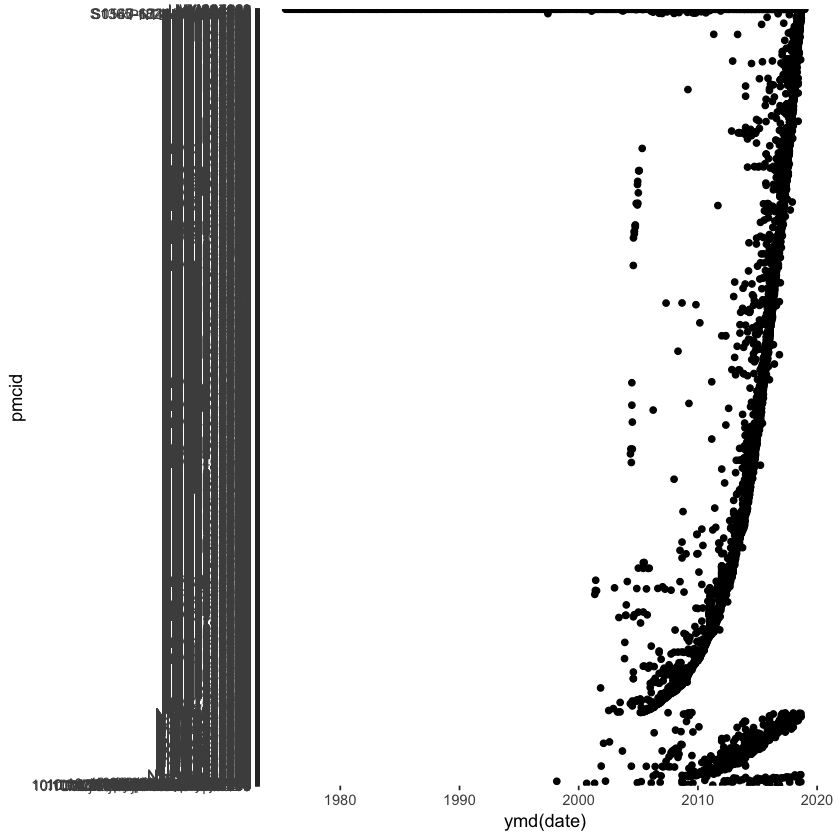

In [27]:
p <- ggplot(yearly_count_df2, aes(ymd(date), pmcid)) + geom_point() 

p

In [28]:
names(df)

[1] "pmid"    "pmcid"   "isopen"  "journal" "date"    "year"    "month"

In [29]:
p2 <- ggplot(df, aes(isopen)) + geom_bar(fill = "black", col = "black") + 
labs(x = "Open access or not", title = "Closed access versus Open access",
y ="Open or closed access", caption = "closed 18530 and open 6713") + theme_classic()

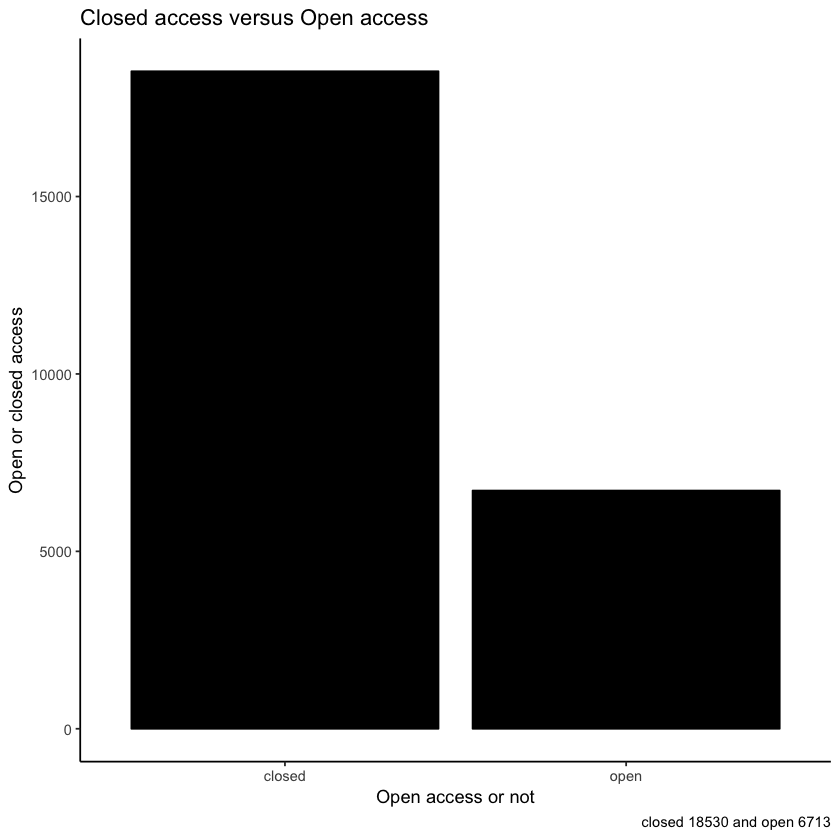

In [30]:
p2

In [31]:
table(df$isopen)


closed   open 
 18530   6713 

Warning message:
“Removed 1129 rows containing missing values (geom_point).”

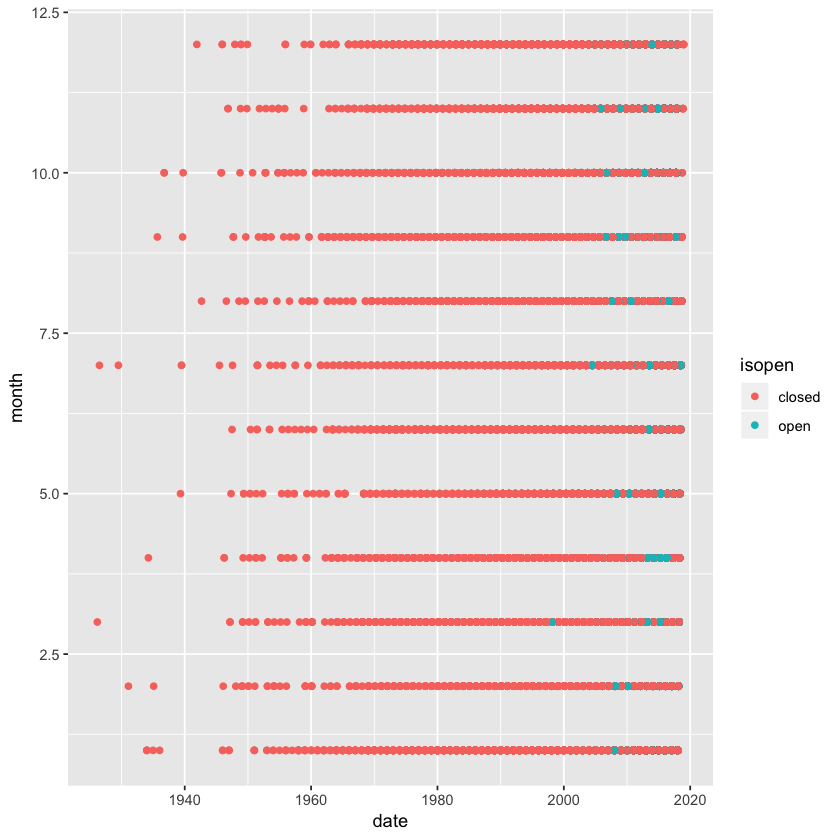

In [32]:
p3 <- ggplot(df, aes(date, month, color = isopen)) + geom_point()

p3

In [36]:
library(trelliscopejs)
library(plotly)

In [38]:
ggplot(df, aes(date, month, color = isopen)) + geom_point() + facet_trelliscope(~ factor(pmcid))

using data from the first layer
ERROR while rich displaying an object: Error in print.facet_trelliscope(obj): all facet_trelliscope facet columns must be found in the data being used

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15

In [33]:
# adding DT into the analysis to allow querying to find these particular dates

datatable(df)

Warning message in instance$preRenderHook(instance):
“It seems your data is too big for client-side DataTables. You may consider server-side processing: https://rstudio.github.io/DT/server.html”ERROR while rich displaying an object: Error in file(file, "rb"): invalid 'description' argument

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_html.htmlwidget(obj)
9. lapply(obj$dependencies, function(dep) {
 .     html <- c()
 

HTML widgets cannot be represented in plain text (need html)

In [34]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS High Sierra 10.13.6

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] bindrcpp_0.2.2  DT_0.4          lubridate_1.7.4 plotly_4.8.0   
 [5] forcats_0.3.0   stringr_1.3.1   dplyr_0.7.6     purrr_0.2.5    
 [9] readr_1.1.1     tidyr_0.8.1     tibble_1.4.2    ggplot2_3.0.0  
[13] tidyverse_1.2.1

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.18         lattice_0.20-35      assertthat_0.2.0    
 [4] digest_0.6.17        mime_0.5             IRdisplay_0.5.0     
 [7] R6_2.2.2             cellranger_1.1.0     plyr_1.8.4          
[10] repr_0.15.0 